Energía perdida por unidad de volumen:  0.0077371255 J/m^3


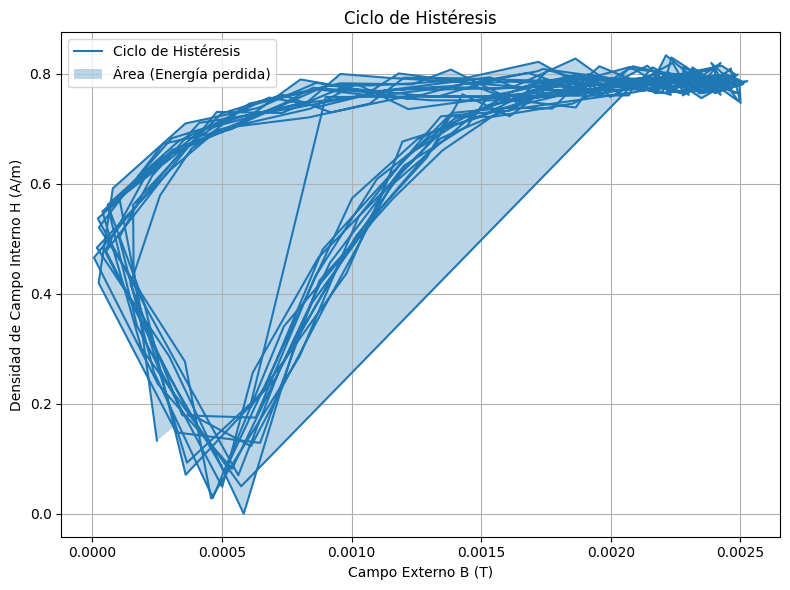

In [10]:
import numpy as np
import matplotlib.pyplot as plt
#from matplotlib.patches import Polygon

ruta_archivo = "hysteresis.dat"

with open(ruta_archivo, "r") as archivo:
    lineas = archivo.readlines()

datos_procesados=[]
for linea in lineas:
  linea_filtrada = linea.replace('-', ' ').split()
  if len(linea_filtrada) == 3:
    datos_procesados.append([float(value) for value in linea_filtrada])

datos= np.array(datos_procesados)

t= datos[:, 0] #Tiempo (ms)
B= datos[:, 1] #Campo externo (mT)
H= datos[:, 2] #Densidad de campo interno (A/m)

#Gráfica
plt.figure(figsize=(8, 6))
plt.plot(B * 1e-3, H, label='Ciclo de Histéresis')  # B (mT -> T)
plt.fill(B * 1e-3, H, alpha=0.3, label='Área (Energía perdida)')
plt.xlabel('Campo Externo B (T)')
plt.ylabel('Densidad de Campo Interno H (A/m)')
plt.title('Ciclo de Histéresis')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.savefig("energy.pdf")
plt.show

#Calculo del área (energía perdida por unidad de volumen)
area=np.trapz(H, B* 1e-3) #Área bajo la curva (T)
print(f"Energía perdida por unidad de volumen: {area: .10f} J/m^3")